In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.font_manager import FontProperties
font_path = '/System/Library/Fonts/Hiragino Sans GB.ttc' # 系统的中文字体，这是mac实现，如果是Window需要切换目录
myfont = FontProperties(fname=font_path)
print(myfont.get_name())
sns.set(font=myfont.get_name())
warnings.filterwarnings('ignore')

Hiragino Sans GB


In [46]:
data = pd.read_csv("../input/products/products.csv")
data.head()

,名称,类别,客户数量,描述
0,移动信贷系统,信贷业务,16,宇信科技移动信贷系统主要是为了实现贷款贷前业务、贷中业务的线上进件和业务审批功能，建立完整的...
1,农户预授信工具,信贷业务,16,宇信科技面向三农及小微信贷业务，以提高工作效率、管控信贷风险为出发点，构建的一套供银行信贷客...
2,财务分析工具,信贷业务,16,宇信科技面向银行对公、小微业务授信流程风险管理，以有效防范风险为出发点，构建财务分析工具。将...
3,信用评级工具,信贷业务,16,宇信科技面向对公、零售、小微信贷业务，以提高银行信用风险管理能力为出发点，构建简洁易用的信用...
4,供应链金融系统,信贷业务,16,"供应链金融系统是字信科技针对信贷业务中""供应链金融”这一细分领域构建的信贷系统。系统涵盖共3..."


In [47]:
totalProduct = data.shape[0]
print(f"客户总量：{totalProduct}")

客户总量：131


# 按分类查看各个类别的产品数量和客户数量

In [48]:
grouped = data.groupby("类别").agg({"客户数量":["count","max"]})

In [49]:
print(type(grouped.dtypes))
print(grouped.index)
print(grouped.columns)

<class 'pandas.core.series.Series'>
Index(['云合规服务', '云安全服务', '信用风险管理体系', '信贷业务', '全面风险管理体系', '员工渠道', '客户渠道',
       '技术工具产品', '技术平台产品', '支付清算', '数据中台', '数据智能', '数据资产', '数据运营', '数据集市',
       '核心系统', '监管合规', '经营管理及数据应用', '网络资源', '计算资源', '贷后管理体系', '资产负债体系',
       '资本管理体系', '远程银行'],
      dtype='object', name='类别')
MultiIndex([('客户数量', 'count'),
            ('客户数量',   'max')],
           )


In [50]:
grouped_ri = grouped.reset_index()
grouped_ri.columns = ['类别','产品数量','客户数量']
grouped_ri.head()

,类别,产品数量,客户数量
0,云合规服务,4,0
1,云安全服务,6,0
2,信用风险管理体系,3,8
3,信贷业务,13,16
4,全面风险管理体系,2,0


In [51]:
print('分类数量:',grouped_ri.shape[0])

分类数量: 24


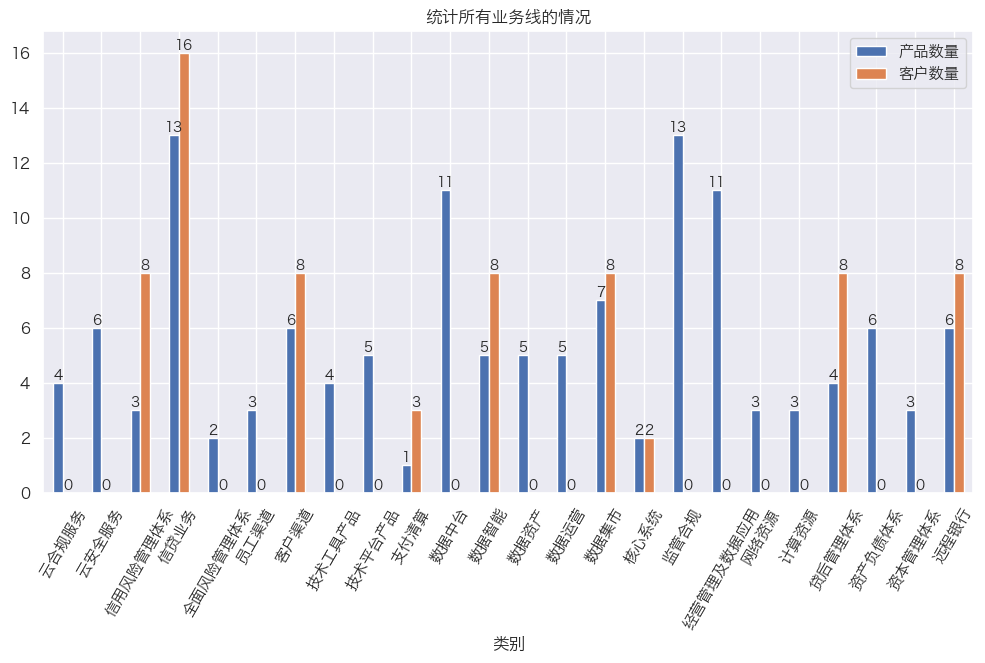

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = grouped_ri.plot.bar(x="类别", y=['产品数量','客户数量'], rot=60, ax=ax)
ax.set_title("统计所有业务线的情况")
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10)

plt.show()

In [53]:
profitable_bus = grouped_ri[grouped_ri["客户数量"] > 0]
profitable_bus

,类别,产品数量,客户数量
2,信用风险管理体系,3,8
3,信贷业务,13,16
6,客户渠道,6,8
9,支付清算,1,3
11,数据智能,5,8
14,数据集市,7,8
15,核心系统,2,2
20,贷后管理体系,4,8
23,远程银行,6,8


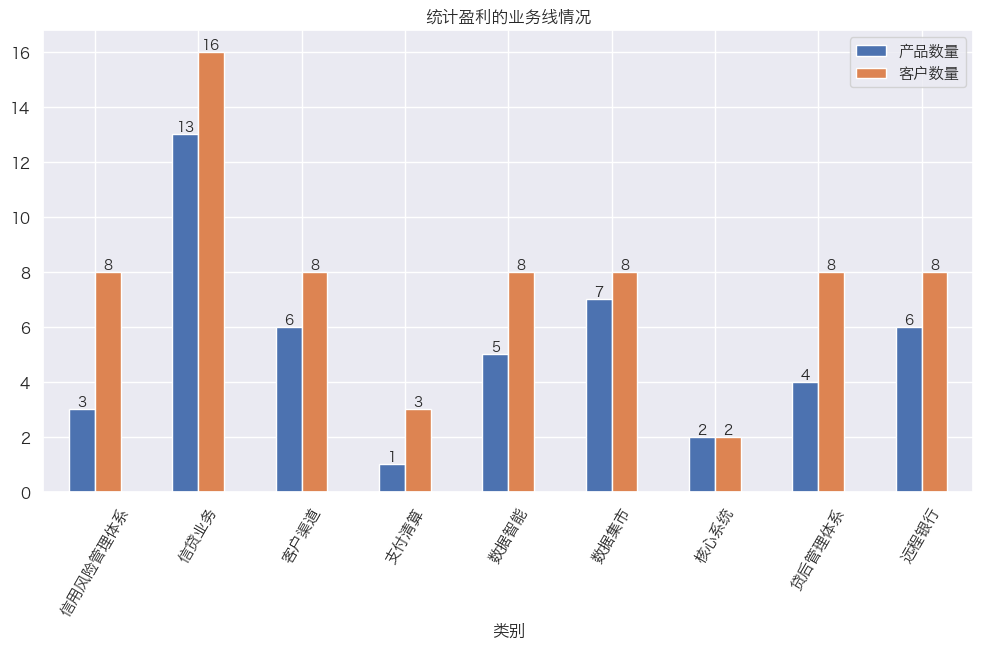

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = profitable_bus.plot.bar(x="类别", y=['产品数量','客户数量'], rot=60, ax=ax)
ax.set_title("统计盈利的业务线情况")
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10)

plt.show()